In [125]:
import yfinance as yf
import pandas as pd
import os

In [126]:
# download historical sp500 data

In [127]:
sp500 = yf.Ticker("^GSPC")

In [128]:
sp500 = sp500.history(period="max")

In [129]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,0.0,0.0
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,0.0,0.0
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,0.0,0.0


In [130]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00',
               '2024-08-05 00:00:00-04:00', '2024-08-06 00:00:00-04:00',
               '2024-08-07 00:00:00-04:00', '2024-08-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24267, freq=None)

In [131]:
# Cleaning and visulizing stock market data

<Axes: xlabel='Date'>

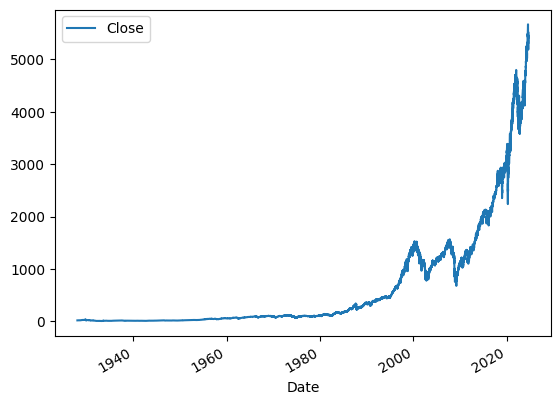

In [132]:
sp500.plot.line(y="Close", use_index = True)

In [133]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [134]:
# Setting target for machine learning

In [135]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [136]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000


In [137]:
# if the target value is 1, the price is going up

In [138]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000


In [139]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [140]:
# Using the data since 1990-01-01 only

In [141]:
sp500 = sp500.loc["1990-01-01":].copy()

In [142]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0


In [143]:
# Traning an initial model

In [144]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# Pick the training set
train = sp500.iloc[:-100]
# Pick the test set
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [145]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [146]:
preds = pd.Series(preds, index = test.index)

In [147]:
# compare the prediction with the real result of test set
precision_score(test["Target"], preds)

0.5384615384615384

In [148]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

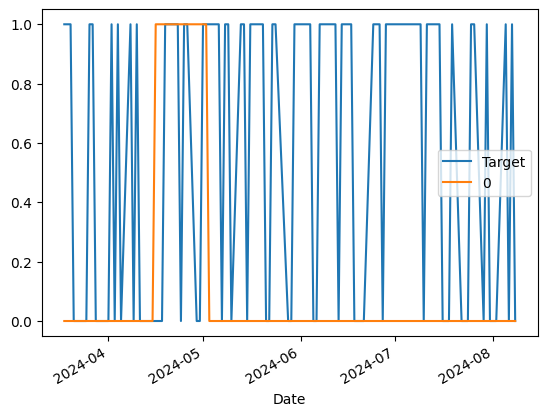

In [149]:
combined.plot()

In [150]:
# Building a backtesting system

In [151]:
def predict(train, test, predictors, model):
    # Train the model using the training set
    model.fit(train[predictors], train["Target"])
    # Make predictions on the test set
    preds = model.predict(test[predictors])
    # Convert predictions to a Series with the same index as the test set
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    # Combine actual target values and predictions into one DataFrame
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [157]:
# take 10 years of data as start point, then step as 1 year of data
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [158]:
predictions = backtest(sp500, model, predictors)

In [159]:
predictions["Predictions"].value_counts()

Predictions
0    3615
1    2602
Name: count, dtype: int64

In [163]:
# Now the precision of the prediction
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [162]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535146
0    0.464854
Name: count, dtype: float64

In [164]:
# Add new predictors to the model
# [last 2 days, last week, last 3 month, last year, last 4 years]
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [166]:
sp500 = sp500.dropna()

In [167]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,3.0,1.005682,37.0,1.115425,141.0,1.270120,527.0
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,5186.330078,0,0.990724,0.0,0.982263,2.0,0.986714,36.0,1.094143,141.0,1.246188,527.0
2024-08-05 00:00:00-04:00,5151.140137,5250.890137,5119.259766,5186.330078,5333250000,5240.029785,1,0.984788,0.0,0.962631,1.0,0.957147,36.0,1.060773,140.0,1.208333,526.0


In [168]:
# improve the model
model = RandomForestClassifier(n_estimators= 200, min_samples_split = 50, random_state = 1)

In [169]:
def predict(train, test, predictors, model):
    # Train the model using the training set
    model.fit(train[predictors], train["Target"])
    # Make predictions on the test set
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    # Convert predictions to a Series with the same index as the test set
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    # Combine actual target values and predictions into one DataFrame
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [175]:
predictions = backtest(sp500, model, new_predictors)

In [176]:
predictions["Predictions"].value_counts()

Predictions
0.0    4378
1.0     838
Name: count, dtype: int64

In [177]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5751789976133651